In [1]:
#! pip install aeon
#! pip install "pydantic<2" --force-reinstall
#! pip install pandas_profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport --> Deprecated
import ydata_profiling as ydp

# Part II: Preprocessing and analysis
The focus in this part is on:
- Extracting the dataset
- Taking and eye in the main charasteristics of the data
- Loading the dataset to our database

## ETL [Extract - Transform - Load]


### Extract
Let's take a look to Vallecas' air quality: [Calidad del aire. Datos desde 2001.  Portal de datos abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=f3c0f7d512273410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default).

#### Download

In [3]:
url = 'https://datos.madrid.es/egob/catalogo/201200-10306320-calidad-aire-horario.zip'
! wget {url}

--2024-12-02 08:21:35--  https://datos.madrid.es/egob/catalogo/201200-10306320-calidad-aire-horario.zip
Resolving datos.madrid.es (datos.madrid.es)... 104.110.191.36, 104.110.191.63, 2a02:26f0:6d00:2a::210:1b9e, ...
Connecting to datos.madrid.es (datos.madrid.es)|104.110.191.36|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://datos.madrid.es:443/datosabiertos/MEDIOAMBIENTE/CALIDAD_DEL_AIRE/2024/10/Anio202410.zip [following]
--2024-12-02 08:21:35--  https://datos.madrid.es/datosabiertos/MEDIOAMBIENTE/CALIDAD_DEL_AIRE/2024/10/Anio202410.zip
Reusing existing connection to datos.madrid.es:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘201200-10306320-calidad-aire-horario.zip’

201200-10306320-cal     [ <=>                ]   3.88M  --.-KB/s    in 0.1s    

2024-12-02 08:21:35 (31.2 MB/s) - ‘201200-10306320-calidad-aire-horario.zip’ saved [4065272]



#### Check format
- **Q**: Can we open de file? Is it tsf/csv/feather...? If not... does the origin specify an API or any instruction (kaggle, HuggingFace)?
- **A**: The downloaded file is a '.zip'. Let's unzip it and take a look.

In [4]:
! unzip 201200-10306320-calidad-aire-horario.zip

Archive:  201200-10306320-calidad-aire-horario.zip
   creating: Anio24/
  inflating: Anio24/abr_mo24.csv     
  inflating: Anio24/abr_mo24.txt     
  inflating: Anio24/abr_mo24.xml     
  inflating: Anio24/ago_mo24.csv     
  inflating: Anio24/ago_mo24.txt     
  inflating: Anio24/ago_mo24.xml     
  inflating: Anio24/ene_mo24.csv     
  inflating: Anio24/ene_mo24.txt     
  inflating: Anio24/ene_mo24.xml     
  inflating: Anio24/feb_mo24.csv     
  inflating: Anio24/feb_mo24.txt     
  inflating: Anio24/feb_mo24.xml     
  inflating: Anio24/jul_mo24.csv     
  inflating: Anio24/jul_mo24.txt     
  inflating: Anio24/jul_mo24.xml     
  inflating: Anio24/jun_mo24.csv     
  inflating: Anio24/jun_mo24.txt     
  inflating: Anio24/jun_mo24.xml     
  inflating: Anio24/mar_mo24.csv     
  inflating: Anio24/mar_mo24.txt     
  inflating: Anio24/mar_mo24.xml     
  inflating: Anio24/may_mo24.csv     
  inflating: Anio24/may_mo24.txt     
  inflating: Anio24/may_mo24.xml     
  inflating: Ani

- **Q**: Now, what type of file contains the compressed file?
- **A**: `.txt`, `.xml` `.csv`
- **Q**: Are they all useful or do they look similar?


In [5]:
! ls Anio24

abr_mo24.csv  ago_mo24.xml  feb_mo24.txt  jun_mo24.csv	mar_mo24.xml  oct_mo24.txt
abr_mo24.txt  ene_mo24.csv  feb_mo24.xml  jun_mo24.txt	may_mo24.csv  oct_mo24.xml
abr_mo24.xml  ene_mo24.txt  jul_mo24.csv  jun_mo24.xml	may_mo24.txt  sep_mo24.csv
ago_mo24.csv  ene_mo24.xml  jul_mo24.txt  mar_mo24.csv	may_mo24.xml  sep_mo24.txt
ago_mo24.txt  feb_mo24.csv  jul_mo24.xml  mar_mo24.txt	oct_mo24.csv  sep_mo24.xml


#### Unify data

- **A**: Same file, different extension
- **Q**: Which one can we work with in an easier way?
- **A**: `.csv`

Delete all extra information we don't need and check

In [6]:
! rm -f Anio24/*txt
! rm -f Anio24/*xml
! ls Anio24

abr_mo24.csv  ene_mo24.csv  jul_mo24.csv  mar_mo24.csv	oct_mo24.csv
ago_mo24.csv  feb_mo24.csv  jun_mo24.csv  may_mo24.csv	sep_mo24.csv


- **Q**: ...but... how is the date saved? Why do we have various files?
- **A**: Seems to be one file per month

- **Q**: Thus... we need to join them. How should we join the files? Let's open two of the files to ckeck

Join all parts

In [7]:
! cat Anio24/ene_mo24.csv

PROVINCIA;MUNICIPIO;ESTACION;MAGNITUD;PUNTO_MUESTREO;ANO;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
28;079;4;1;28079004_1_38;2024;01;01;2;V;2;V;2;V;1;V;2;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;2;V;2;V;3;V;3;V;4;V;4;V;4;V;4;V;3;V;2;V;3;V;2;V
28;079;4;1;28079004_1_38;2024;01;02;2;V;2;V;2;V;1;V;1;V;1;V;1;V;2;V;3;V;2;V;2;V;2;V;2;V;3;V;3;V;4;V;3;V;3;V;4;V;4;V;4;V;3;V;4;V;3;V
28;079;4;1;28079004_1_38;2024;01;03;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;3;V;3;V;3;V;2;V;2;V;3;V;3;V;3;V;3;V;3;V;2;V;3;V
28;079;4;1;28079004_1_38;2024;01;04;2;V;2;V;1;V;1;V;1;V;1;V;1;V;1;V;2;V;3;V;2;V;2;V;3;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;2;V;1;V
28;079;4;1;28079004_1_38;2024;01;05;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;2;V;2;V;3;V;3;V;3;V;4;V;3;V;3;V;3;V;4;V;3;V;2;V;2;V;2;V;2;V
28;079;4;1;28079004_1_38;2024;01;06;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;1;V;2;V

It has table format... let's read with pandas for better view

In [8]:
# Prepare next readings, we never know if we may get back for more data
months=["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep","oct", "nov", "dic"]
year=24
# Read the dataset
air_quality_ds = pd.read_csv(
    filepath_or_buffer = f"./Anio{year}/{months[0]}_mo{year}.csv",
    delimiter = ";",
    header = 0,
    index_col = None,
    usecols = None
    #dtype = float --> We don't know still the data types!!
)

In [9]:
air_quality_ds.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2024,1,1,2.0,V,...,4.0,V,3.0,V,2.0,V,3.0,V,2.0,V
1,28,79,4,1,28079004_1_38,2024,1,2,2.0,V,...,4.0,V,4.0,V,3.0,V,4.0,V,3.0,V
2,28,79,4,1,28079004_1_38,2024,1,3,2.0,V,...,3.0,V,3.0,V,3.0,V,2.0,V,3.0,V
3,28,79,4,1,28079004_1_38,2024,1,4,2.0,V,...,2.0,V,2.0,V,2.0,V,2.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2024,1,5,1.0,V,...,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V


Observe the date is on the columns
ANO -> Year
MES -> Month
DIA -> Day
Thus, we should not have problems on joining all dataFrames in one single dataFrame.

In [10]:
#months=["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep","oct", "nov", "dic"]
#years = [24]
#air_quality_ds = None
#for year in years:
#  for month in months:
#    air_quality_ds_ = pd.read_csv(
#      filepath_or_buffer = f"./Anio{year}/{month}_mo{year}.csv",
#      delimiter = ";",
#      header = 0,
#      index_col = None,
#      usecols = None
#      #dtype = float
#    )
#    if month == "ene":
#      air_quality_ds = air_quality_ds_
#    else:
#      pd.concat([air_quality_ds, air_quality_ds_])
#print(air_quality_ds.shape)
#air_quality_ds.head()

Ops! No november... Neither dic... check in local..
In fact... no november gived! No december! ... of course... today is 1/12, too early! Fix the months list!

In [11]:
months=["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep","oct"]
years = [24]
air_quality_ds = None
for year in years:
  for month in months:
    air_quality_ds_ = pd.read_csv(
      filepath_or_buffer = f"./Anio{year}/{month}_mo{year}.csv",
      delimiter = ";",
      # header = 0,
      index_col = None,
      usecols = None
    )
    if month == "ene":
      air_quality_ds = air_quality_ds_
    else:
      pd.concat([air_quality_ds, air_quality_ds_])
print(air_quality_ds.shape)
air_quality_ds.head()

(4005, 56)


,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2024,1,1,2.0,V,...,4.0,V,3.0,V,2.0,V,3.0,V,2.0,V
1,28,79,4,1,28079004_1_38,2024,1,2,2.0,V,...,4.0,V,4.0,V,3.0,V,4.0,V,3.0,V
2,28,79,4,1,28079004_1_38,2024,1,3,2.0,V,...,3.0,V,3.0,V,3.0,V,2.0,V,3.0,V
3,28,79,4,1,28079004_1_38,2024,1,4,2.0,V,...,2.0,V,2.0,V,2.0,V,2.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2024,1,5,1.0,V,...,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V


### Transform
We got the dataset, but...
- Does it look like a time series?
- Does it have duplicated information?
- Do I need the full dataset?
- What datatype shoul each column be treated as?
- How do I filter for 'Vallecas'?

#### Look to de data... and documentation
- What do the columns name say? Are they self-explicative?
- What do the docs say?



In [12]:
air_quality_ds.columns

Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'DIA', 'H01', 'V01', 'H02', 'V02', 'H03', 'V03', 'H04',
       'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07', 'H08', 'V08', 'H09',
       'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12', 'H13', 'V13', 'H14',
       'V14', 'H15', 'V15', 'H16', 'V16', 'H17', 'V17', 'H18', 'V18', 'H19',
       'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22', 'H23', 'V23', 'H24',
       'V24'],
      dtype='object')

Check [Datos Madrid | Dataset description](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)

- PROVINCIA: we want to check 'Madrid'
- MUNICIPIO: we want to focus on 'Madrid'
- ESTACION: we want to focus on 'Vallecas'
- MAGNITUD: We want each magnitude to be a column
- PUNTO_MUESTREO: let's tale a look and decide 1 if needed (technique used)
- V*: Validation code
- H*: Hour -> Must be part of  the date

##### Delete extra information
- Delete columns with just one value (use `np.unique` for checking)
- Filter by Vallecas (Municipio = Madrid, Provincia = Madrid, ESTACION + CODE = Ver código)


In [13]:
vallecas_code = "28079040"

In [14]:
np.unique(air_quality_ds["PROVINCIA"].values)

array([28])

In [15]:
np.unique(air_quality_ds["MUNICIPIO"].values)

array([79])

In [16]:
np.unique(air_quality_ds["ESTACION"].values)

array([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50,
       54, 55, 56, 57, 58, 59, 60])

In [17]:
air_quality_ds.drop(columns='PROVINCIA', inplace=True) #Inplace = Don't make ca copy

##### Process the columns with multiple information

PUNTO_MUESTREO has 3 data in one column... and one is the one we need to filter by...
- Split it using `str.split(separator, expand = True)`
- Check the result displying the head

In [18]:
print(np.unique(air_quality_ds["PUNTO_MUESTREO"].values)[:3])
# Dividir la columna 'PUNTO_MUESTREO' en tres nuevas columnas
air_quality_ds[['ESTACION_code', 'ESTACION_magnitud', 'ESTACION_technique']] = air_quality_ds['PUNTO_MUESTREO'].str.split('_', expand=True)
# Verificar el resultado
print(display(air_quality_ds.head()))


['28079004_12_8' '28079004_1_38' '28079004_6_48']


,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,V21,H22,V22,H23,V23,H24,V24,ESTACION_code,ESTACION_magnitud,ESTACION_technique
0,79,4,1,28079004_1_38,2024,1,1,2.0,V,2.0,...,V,2.0,V,3.0,V,2.0,V,28079004,1,38
1,79,4,1,28079004_1_38,2024,1,2,2.0,V,2.0,...,V,3.0,V,4.0,V,3.0,V,28079004,1,38
2,79,4,1,28079004_1_38,2024,1,3,2.0,V,2.0,...,V,3.0,V,2.0,V,3.0,V,28079004,1,38
3,79,4,1,28079004_1_38,2024,1,4,2.0,V,2.0,...,V,2.0,V,2.0,V,1.0,V,28079004,1,38
4,79,4,1,28079004_1_38,2024,1,5,1.0,V,1.0,...,V,2.0,V,2.0,V,2.0,V,28079004,1,38


None


##### Continue filtering and deleteing unneccesary information and duplicates

- Filter by Vallecas using the station code.
- Check the filtering by showing the unique values
- Continue cleaning

In [19]:
print(np.unique(air_quality_ds["ESTACION_code"])[:4])
air_quality_ds_vallecas = air_quality_ds.loc[air_quality_ds["ESTACION_code"] == vallecas_code]
print(np.unique(air_quality_ds_vallecas["ESTACION_code"])[:4])

['28079004' '28079008' '28079011' '28079016']
['28079040']


In [20]:
air_quality_ds_vallecas.drop(columns='ESTACION_code', inplace=True)

<ipython-input-20-6bf8471be1b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.drop(columns='ESTACION_code', inplace=True)


Continue droping all unneccesary columns

In [21]:
air_quality_ds_vallecas.drop(columns = "PUNTO_MUESTREO", inplace = True)
#print(air_quality_ds_vallecas.columns)
#print(np.unique(air_quality_ds_vallecas["MUNICIPIO"]))
air_quality_ds_vallecas.drop(columns = "MUNICIPIO", inplace = True)
#print(np.unique(air_quality_ds_vallecas["ESTACION"]))
air_quality_ds_vallecas.drop(columns = "ESTACION", inplace = True)
#print(np.unique(air_quality_ds_vallecas["MAGNITUD"]))
#all_match = (air_quality_ds["MAGNITUD"] == air_quality_ds["ESTACION_magnitud"]).all()
#print(all_match)
air_quality_ds["ESTACION_magnitud"] = air_quality_ds["ESTACION_magnitud"].astype(int)
#mismatch = air_quality_ds[air_quality_ds["MAGNITUD"] != air_quality_ds["ESTACION_magnitud"]]
air_quality_ds_vallecas.drop(columns = "ESTACION_magnitud", inplace = True)
#print(np.unique(air_quality_ds_vallecas[["MAGNITUD", "ESTACION_technique"]].astype(int), axis = 0))
# We are not gonna take into account the technique, and it seems to be only one technique for magnitude. Thus, we can delete that column
air_quality_ds_vallecas.drop(columns="ESTACION_technique", inplace=True)

display(air_quality_ds_vallecas.head())

<ipython-input-21-9e1edb79424b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.drop(columns = "PUNTO_MUESTREO", inplace = True)
<ipython-input-21-9e1edb79424b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.drop(columns = "MUNICIPIO", inplace = True)
<ipython-input-21-9e1edb79424b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.drop(columns = "ESTACION", inpl

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
2207,7,2024,1,1,18.0,V,18.0,V,18.0,V,...,3.0,V,15.0,V,36.0,V,10.0,V,4.0,V
2208,7,2024,1,2,2.0,V,1.0,V,1.0,V,...,40.0,V,23.0,V,27.0,V,8.0,V,2.0,V
2209,7,2024,1,3,1.0,V,1.0,V,1.0,V,...,11.0,V,14.0,V,19.0,V,26.0,V,49.0,V
2210,7,2024,1,4,27.0,V,2.0,V,2.0,V,...,26.0,V,37.0,V,6.0,V,3.0,V,2.0,V
2211,7,2024,1,5,1.0,V,1.0,V,1.0,V,...,5.0,V,4.0,V,3.0,V,1.0,V,1.0,V


##### Index formating

Now we have three problems:

- We want date to be the index
- We want magnitude to be the column
- What do we do with validation ?

- We need H* to be a row V* to be a single column V
- We need MAGNITUD to be a column MAGNITUD-K
- ... Validation says if the data is valid or not. We don't want invalid data! Lets put a NaN where a 'V' is found

In [22]:
air_quality_ds_vallecas.loc[:, "ANO"] = air_quality_ds_vallecas["ANO"].astype(int)
air_quality_ds_vallecas.loc[:, "MES"] = air_quality_ds_vallecas["MES"].astype(int)
air_quality_ds_vallecas.loc[:, "DIA"] = air_quality_ds_vallecas["DIA"].astype(int)
air_quality_ds_vallecas.loc[:,"DATE"] = pd.to_datetime(
    air_quality_ds_vallecas[["ANO", "MES", "DIA"]].rename(columns={"ANO": "year", "MES": "month", "DIA": "day"})
)
air_quality_ds_vallecas.drop(columns=["ANO", "MES", "DIA"], inplace = True)
display(air_quality_ds_vallecas)

<ipython-input-22-9df0ff7e9af4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.loc[:,"DATE"] = pd.to_datetime(
<ipython-input-22-9df0ff7e9af4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_ds_vallecas.drop(columns=["ANO", "MES", "DIA"], inplace = True)


,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,DATE
2207,7,18.0,V,18.0,V,18.0,V,14.0,V,14.0,...,V,15.0,V,36.0,V,10.0,V,4.0,V,2024-01-01
2208,7,2.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,23.0,V,27.0,V,8.0,V,2.0,V,2024-01-02
2209,7,1.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,14.0,V,19.0,V,26.0,V,49.0,V,2024-01-03
2210,7,27.0,V,2.0,V,2.0,V,1.0,V,1.0,...,V,37.0,V,6.0,V,3.0,V,2.0,V,2024-01-04
2211,7,1.0,V,1.0,V,1.0,V,2.0,V,1.0,...,V,4.0,V,3.0,V,1.0,V,1.0,V,2024-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,12,83.0,V,40.0,V,29.0,V,26.0,V,20.0,...,V,127.0,V,104.0,V,75.0,V,58.0,V,2024-01-27
2327,12,55.0,V,39.0,V,34.0,V,26.0,V,22.0,...,V,163.0,V,130.0,V,54.0,V,47.0,V,2024-01-28
2328,12,37.0,V,35.0,V,36.0,V,23.0,V,14.0,...,V,100.0,V,124.0,V,35.0,V,59.0,V,2024-01-29
2329,12,47.0,V,28.0,V,17.0,V,21.0,V,18.0,...,V,87.0,V,76.0,V,66.0,V,92.0,V,2024-01-30


**Alert**

When making big conversions (if it fits in memory) make a copy to ensure you can go back an step.

In [23]:
df = air_quality_ds_vallecas.copy() #Take care in this part
display(df.head())

,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,DATE
2207,7,18.0,V,18.0,V,18.0,V,14.0,V,14.0,...,V,15.0,V,36.0,V,10.0,V,4.0,V,2024-01-01
2208,7,2.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,23.0,V,27.0,V,8.0,V,2.0,V,2024-01-02
2209,7,1.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,14.0,V,19.0,V,26.0,V,49.0,V,2024-01-03
2210,7,27.0,V,2.0,V,2.0,V,1.0,V,1.0,...,V,37.0,V,6.0,V,3.0,V,2.0,V,2024-01-04
2211,7,1.0,V,1.0,V,1.0,V,2.0,V,1.0,...,V,4.0,V,3.0,V,1.0,V,1.0,V,2024-01-05


In [24]:
# Come here to restore if needed
air_quality_ds_vallecas = df.copy()
air_quality_ds_vallecas.head()

,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,DATE
2207,7,18.0,V,18.0,V,18.0,V,14.0,V,14.0,...,V,15.0,V,36.0,V,10.0,V,4.0,V,2024-01-01
2208,7,2.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,23.0,V,27.0,V,8.0,V,2.0,V,2024-01-02
2209,7,1.0,V,1.0,V,1.0,V,1.0,V,1.0,...,V,14.0,V,19.0,V,26.0,V,49.0,V,2024-01-03
2210,7,27.0,V,2.0,V,2.0,V,1.0,V,1.0,...,V,37.0,V,6.0,V,3.0,V,2.0,V,2024-01-04
2211,7,1.0,V,1.0,V,1.0,V,2.0,V,1.0,...,V,4.0,V,3.0,V,1.0,V,1.0,V,2024-01-05


First step: 'V' => Valid other => not valid => NaN

In [25]:
hs = [f"H{str(i).zfill(2)}" for i in range(1, 25)]
vs = [f"V{str(i).zfill(2)}" for i in range(1, 25)]
for h, v in zip(hs, vs):
    air_quality_ds_vallecas.loc[air_quality_ds_vallecas[v] != "V", h] = np.nan

Second step: Hours to rows -> Use `melt`

In [26]:
# Hours to rows
melted = air_quality_ds_vallecas.melt(
    id_vars=["DATE", "MAGNITUD"],
    value_vars=hs,
    var_name="HORA",
    value_name="VALOR"
)
melted.loc[:, "HORA"] = melted["HORA"].str.replace("H", "").astype(int)
melted.loc[:, "HORA"] = pd.to_timedelta(melted["HORA"], unit="h", errors="coerce")
print(melted["DATE"].dtype)  # Should print datetime64[ns]

datetime64[ns]


Third step: Join Date + Hour to get the timestamps and drop Hour extra column

In [27]:
# Ensure DATE is explicitly converted to datetime64 format
melted.loc[:, "DATE"] = pd.to_datetime(melted["DATE"], errors="coerce")
print(melted["HORA"].dtype)  # Should output: timedelta64[ns]
# Add the timedelta to DATE (this should now work properly)
melted.loc[:, "DATE"] = melted["DATE"] + melted["HORA"]
display(melted.head())

object


<ipython-input-27-a9a325bc9643>:5: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  melted.loc[:, "DATE"] = melted["DATE"] + melted["HORA"]


,DATE,MAGNITUD,HORA,VALOR
0,2024-01-01 01:00:00,7,0 days 01:00:00,18.0
1,2024-01-02 01:00:00,7,0 days 01:00:00,2.0
2,2024-01-03 01:00:00,7,0 days 01:00:00,1.0
3,2024-01-04 01:00:00,7,0 days 01:00:00,27.0
4,2024-01-05 01:00:00,7,0 days 01:00:00,1.0


In [28]:
# Drop 'HORA'
melted.drop(columns=["HORA"], inplace=True)

Four step: convert magnitudes from rows to columns
- Generate a column with explicative laved for each magnitude by adding a header 'MAGNITUD_' to 'MAGNITUD'. Use 'MAGNITUD' column `astype` str.

In [29]:
# Generate explicative labels
melted["MAGNITUD_LABEL"] = "MAGNITUD_" + melted["MAGNITUD"].astype(str)
# Pivot
result = melted.pivot_table(
    index="DATE",              # Usar la fecha completa (DATE) como índice
    columns="MAGNITUD_LABEL",  # Cada valor de MAGNITUD será una columna
    values="VALOR",            # Los valores medidos irán en las celdas
    aggfunc="first"            # Si hay duplicados, se toma el primero
)

display(result.head())

MAGNITUD_LABEL,MAGNITUD_10,MAGNITUD_12,MAGNITUD_7,MAGNITUD_8
DATE,,,,
2024-01-01 01:00:00,NaN,68.0,18.0,40.0
2024-01-01 02:00:00,NaN,83.0,18.0,57.0
2024-01-01 03:00:00,NaN,85.0,18.0,57.0
2024-01-01 04:00:00,NaN,63.0,14.0,42.0
2024-01-01 05:00:00,NaN,71.0,14.0,50.0


Take a look to Magnitud 10... something strange, no?

In [30]:
display(result[result["MAGNITUD_10"].notna()].head())


MAGNITUD_LABEL,MAGNITUD_10,MAGNITUD_12,MAGNITUD_7,MAGNITUD_8
DATE,,,,
2024-01-01 06:00:00,34.0,100.0,32.0,51.0
2024-01-01 07:00:00,34.0,74.0,19.0,45.0
2024-01-01 08:00:00,32.0,39.0,2.0,36.0
2024-01-01 09:00:00,30.0,28.0,1.0,27.0
2024-01-01 10:00:00,25.0,26.0,3.0,21.0


It is only read at 01:00! Nothing to worry about... but check how to handle this missing values... that's future!

In [33]:
air_quality_ds_vallecas = result.copy()

##### EDA

Now that the dataframe is under control...
Take the profiling for a basic analysis before continuing the transformations

In [32]:

air_quality_ds_vallecas = result.copy()
# Crear el perfil para el DataFrame 'result'
profile = ydp.ProfileReport(air_quality_ds_vallecas, title="Pandas Profiling Report for 'air_quality_ds_vallecas'", explorative=True)

# Mostrar el reporte en el notebook
profile.to_notebook_iframe()

# (Opcional) Guardar el reporte como un archivo HTML
profile.to_file("result_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Windows function for checking examples of sliding windows

### Sliding windows

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Rectangle

In [ ]:
def generate_stack_dataframe(n_points=274, noise_std=100.1, period=7):
    """
    Generates a synthetic stacked dataframe with seasonality and noise.

    Parameters:
    - n_points (int): Number of data points for the time series.
    - noise_std (float): Standard deviation of the noise to be added to the series.
    - period (int): Period of the sinusoidal seasonality.

    Returns:
    - pd.DataFrame: Dataframe with two columns: 'TS_24hrs' (timestamps) and 'count' (values).
    """
    df = pd.DataFrame({
        "TS_24hrs": np.arange(0, n_points),
        "count": np.abs(
            np.sin(2 * np.pi * np.arange(0, n_points) / period) +
            np.random.normal(0, noise_std, size=n_points)
        )
    })
    return df

In [ ]:
def sliding_window_animation(
    df,
    m_train=25,
    m_test=10,
    stride=6,
    save_as="sliding_window.gif",
    interval=300,
    label1="Train Window",
    label2=None,  # Default is None for single-window case
    show_prev1=False,
    show_prev2=False,
    prev_alpha=0.2,  # Transparency for accumulated windows
    train_color="green",
    test_color="blue",
    train_color_prev="lightgreen",
    test_color_prev="lightblue",
    train_line=False,
    train_line_color="green",
    train_line_prev=False,
    train_prev_line_color="lightgreen",
    test_line=False,
    test_line_color="blue",
    test_line_prev=False,
    test_prev_line_color="lightblue"
):
    """
    Creates and saves a sliding window animation for a given dataframe.

    Returns:
    - None: Saves the animation as a GIF file and prints accumulated timestamps.
    """
    # Define constants
    Y_LIM = max(df["count"]) + 20  # Dynamic Y-axis limit based on data

    # Lists to accumulate window indices
    train_indices = []
    test_indices = [] if label2 else None  # Only initialize if label2 is not None

    # Initialize the plot
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot the data
    ax.plot(df['TS_24hrs'], df['count'], 'r-', linewidth=0.5, label='Data or y')
    ax.set_title('Sliding Window Animation')
    ax.set_ylabel('Count', fontsize=15)
    ax.set_xlabel('Timestamp [24hrs]', fontsize=15)
    ax.grid(True)
    fig.tight_layout(pad=1.2)

    # Initialize rectangles and line placeholders
    def init_rectangles():
        rects = [Rectangle((0, 0), m_train, Y_LIM, alpha=0.3, facecolor=train_color)]
        if label2:
            rects.append(Rectangle((0 + m_train, 0), m_test, Y_LIM, alpha=0.3, facecolor=test_color))
        return [ax.add_patch(rect) for rect in rects]

    # Line placeholders for train and test
    train_line_ref = [None]
    train_line_prev_ref = [None]
    test_line_ref = [None]
    test_line_prev_ref = [None]

    # Update function for animation
    def update_rectangles(x_start):
        """
        Updates the positions of the Train and Test rectangles for the current frame.
        """
        # Clear previous train line
        if train_line_ref[0] is not None:
            train_line_ref[0].remove()
        if train_line_prev and train_line_prev_ref[0] is not None:
            train_line_prev_ref[0].remove()

        # Show the previous train window
        if show_prev1:
            ax.add_patch(Rectangle(
                (patches[0].xy[0], 0), m_train, Y_LIM, alpha=prev_alpha, facecolor=train_color_prev
            ))

        # Draw vertical lines for train window
        if train_line:
            train_line_ref[0] = ax.axvline(x=x_start, color=train_line_color, linestyle="--", linewidth=1.5)  # Line at start of current window
        if train_line_prev and show_prev1:
            train_line_prev_ref[0] = ax.axvline(x=x_start - stride + m_train - 1, color=train_prev_line_color, linestyle="--", linewidth=1)  # Line at end of previous window

        # Update current train window
        patches[0].xy = (x_start, 0)
        train_indices.append([int(x_start), int(x_start + m_train - 1)])

        # Clear previous test line
        if label2 and test_line_ref[0] is not None:
            test_line_ref[0].remove()
        if label2 and test_line_prev and test_line_prev_ref[0] is not None:
            test_line_prev_ref[0].remove()

        # Handle the test window if label2 is provided
        if label2:
            if show_prev2:
                ax.add_patch(Rectangle(
                    (patches[1].xy[0], 0), m_test, Y_LIM, alpha=prev_alpha, facecolor=test_color_prev
                ))

            # Draw vertical lines for test window
            if test_line:
                test_line_ref[0] = ax.axvline(x=x_start + m_train, color=test_line_color, linestyle="--", linewidth=1.5)  # Line at start of current test window
            if test_line_prev and show_prev2:
                test_line_prev_ref[0] = ax.axvline(x=x_start + m_train - stride + m_test - 1, color=test_prev_line_color, linestyle="--", linewidth=1)  # Line at end of previous test window

            patches[1].xy = (x_start + m_train, 0)
            test_indices.append([int(x_start + m_train), int(x_start + m_train + m_test - 1)])
            ax.legend(
                [patches[0], patches[1]],
                [
                    f"{label1}: [{int(x_start)}, {int(x_start + m_train - 1)}]",
                    f"{label2}: [{int(x_start + m_train)}, {int(x_start + m_train + m_test - 1)}]"
                ],
                loc="upper left"
            )
        else:
            ax.legend(
                [patches[0]],
                [f"{label1}: [{int(x_start)}, {int(x_start + m_train - 1)}]"],
                loc="upper left"
            )
        return patches

    # Create animation
    patches = init_rectangles()
    frames = np.arange(0, df['TS_24hrs'].iloc[-1] - m_train - (m_test if label2 else 0) + 1, stride)

    ani = FuncAnimation(
        fig,
        update_rectangles,
        frames=frames,
        interval=interval,
        blit=True
    )

    # Save animation as a GIF
    gif_writer = PillowWriter(fps=2)
    ani.save(save_as, writer=gif_writer)

    # Print accumulated indices starting from the third entry
    print(f"Timestamps for {label1}: {train_indices[3:]}")
    if label2 and test_indices:
        print(f"Timestamps for {label2}: {test_indices[3:]}")

    print(f"Animation saved as {save_as}")


In [ ]:
# Generate stack overflow's dataset
example_df = generate_stack_dataframe()

In [ ]:
# Create the animation
sliding_window_animation(
    example_df,
    m_train=25,
    m_test=10,
    stride=6,
    save_as="sliding_window_example_1.gif",
    interval = 300,
    label1 = "Window",
    show_prev1 = True,
    train_color_prev = "lightblue",
    train_line=True,
    train_line_color = "green",
    train_line_prev = True,
    train_prev_line_color = "blue",
    prev_alpha = 0.25
    #label1 = "Train",
    #label2 = "Test"
)

### Expanding window

In [ ]:
def expanding_window_animation(
    df,
    initial_train=10,  # Initial size of the expanding window
    m_test=10,
    delta =6,
    save_as="expanding_window.gif",
    interval=300,
    label1="Expanding Train Window",
    label2=None,  # Default is None for single-window case
    show_prev1=False,
    show_prev2=False,
    prev_alpha=0.2,  # Transparency for accumulated windows
    train_color="green",
    test_color="blue",
    train_color_prev="lightgreen",
    test_color_prev="lightblue",
    train_line=False,
    train_line_color="green",
    train_line_prev=False,
    train_prev_line_color="lightgreen",
    test_line=False,
    test_line_color="blue",
    test_line_prev=False,
    test_prev_line_color="lightblue"
):
    """
    Creates and saves an expanding window animation for a given dataframe.

    Parameters:
    - df (pd.DataFrame): Dataframe containing the time series with columns 'TS_24hrs' and 'count'.
    - initial_train (int): Initial size of the expanding train window.
    - m_test (int): Size of the testing window.
    - delta (int): Step size (delta) for expanding the window.
    - save_as (str): Filename for the saved animation in GIF format.
    - interval (int): Interval between frames in milliseconds.
    - prev_alpha (float): Transparency level for previous windows.

    Returns:
    - None: Saves the animation as a GIF file and prints accumulated timestamps.
    """
    # Define constants
    Y_LIM = max(df["count"]) + 20  # Dynamic Y-axis limit based on data

    # Lists to accumulate window indices
    train_indices = []
    test_indices = [] if label2 else None  # Only initialize if label2 is not None

    # Initialize the plot
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot the data
    ax.plot(df['TS_24hrs'], df['count'], 'r-', linewidth=0.5, label='Data or y')
    ax.set_title('Expanding Window Animation')
    ax.set_ylabel('Count', fontsize=15)
    ax.set_xlabel('Timestamp [24hrs]', fontsize=15)
    ax.grid(True)
    fig.tight_layout(pad=1.2)

    # Initialize rectangles and line placeholders
    def init_rectangles():
        rects = [Rectangle((0, 0), initial_train, Y_LIM, alpha=0.3, facecolor=train_color)]
        if label2:
            rects.append(Rectangle((initial_train, 0), m_test, Y_LIM, alpha=0.3, facecolor=test_color))
        return [ax.add_patch(rect) for rect in rects]

    # Line placeholders for train and test
    train_line_ref = [None]
    train_line_prev_ref = [None]
    test_line_ref = [None]
    test_line_prev_ref = [None]

    # Update function for animation
    def update_rectangles(x_start):
        """
        Updates the positions of the Train and Test rectangles for the current frame.
        """
        current_train = initial_train + x_start  # Expanding window size

        # Clear previous train line
        if train_line_ref[0] is not None:
            train_line_ref[0].remove()
        if train_line_prev and train_line_prev_ref[0] is not None:
            train_line_prev_ref[0].remove()

        # Show the previous train window
        if show_prev1:
            ax.add_patch(Rectangle(
                (patches[0].xy[0], 0), patches[0].get_width(), Y_LIM, alpha=prev_alpha, facecolor=train_color_prev
            ))

        # Draw vertical lines for train window
        if train_line:
            train_line_ref[0] = ax.axvline(x=0, color=train_line_color, linestyle="--", linewidth=1.5)  # Start of expanding window
        if train_line_prev and show_prev1:
            train_line_prev_ref[0] = ax.axvline(x=current_train - delta - 1, color=train_prev_line_color, linestyle="--", linewidth=1)

        # Update current train window
        patches[0].set_width(current_train)
        patches[0].xy = (0, 0)
        train_indices.append([0, int(current_train - 1)])

        # Clear previous test line
        if label2 and test_line_ref[0] is not None:
            test_line_ref[0].remove()
        if label2 and test_line_prev and test_line_prev_ref[0] is not None:
            test_line_prev_ref[0].remove()

        # Handle the test window if label2 is provided
        if label2:
            if show_prev2:
                ax.add_patch(Rectangle(
                    (patches[1].xy[0], 0), patches[1].get_width(), Y_LIM, alpha=prev_alpha, facecolor=test_color_prev
                ))

            # Draw vertical lines for test window
            if test_line:
                test_line_ref[0] = ax.axvline(x=current_train, color=test_line_color, linestyle="--", linewidth=1.5)  # Start of test window
            if test_line_prev and show_prev2:
                test_line_prev_ref[0] = ax.axvline(x=current_train - delta + m_test - 1, color=test_prev_line_color, linestyle="--", linewidth=1)

            patches[1].xy = (current_train, 0)
            test_indices.append([int(current_train), int(current_train + m_test - 1)])
            ax.legend(
                [patches[0], patches[1]],
                [
                    f"{label1}: [0, {int(current_train - 1)}]",
                    f"{label2}: [{int(current_train)}, {int(current_train + m_test - 1)}]"
                ],
                loc="upper left"
            )
        else:
            ax.legend(
                [patches[0]],
                [f"{label1}: [0, {int(current_train - 1)}]"],
                loc="upper left"
            )
        return patches

    # Create animation
    patches = init_rectangles()
    frames = np.arange(0, (df['TS_24hrs'].iloc[-1] - initial_train - (m_test if label2 else 0)) + 1, delta)

    ani = FuncAnimation(
        fig,
        update_rectangles,
        frames=frames,
        interval=interval,
        blit=True
    )

    # Save animation as a GIF
    gif_writer = PillowWriter(fps=2)
    ani.save(save_as, writer=gif_writer)

    # Print accumulated indices starting from the third entry
    print(f"Timestamps for {label1}: {train_indices[3:]}")
    if label2 and test_indices:
        print(f"Timestamps for {label2}: {test_indices[3:]}")

    print(f"Animation saved as {save_as}")


In [ ]:
expanding_window_animation(
    example_df,
    initial_train=10,
    m_test=10,
    delta=6,
    save_as="expanding_window_example.gif",
    interval = 300,
    label1 = "Window",
    show_prev1 = True,
    train_color_prev = "lightblue",
    train_line=True,
    train_line_color = "green",
    train_line_prev = True,
    train_prev_line_color = "blue",
    prev_alpha = 0.25
)


# Univariate real-world time series exploratory analysis: Kohl's
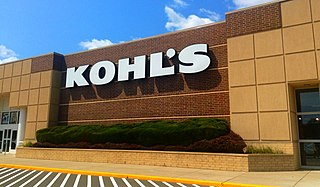

This part analyzes the dataset descripted at [Stumpy - Time series Chains tutorial](https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html). The time series displays ten years of web query volume for the keyword [Kohl's](https://www.kohls.com/) (an American retail chain, [Wikipedia](https://es.wikipedia.org/wiki/Kohl's)) from 2004 to 2014.


## ETL
To understand the data we need to see it, let's start with the data extraction, transform and load.

### Extract
The dataset is given as a .csv through zenodo. So, we must download it using ``! wget``.

In [ ]:
kohls_filename = "Time_Series_Chains_Kohls_data"
kohls_extension = "csv"
kohls_url = f"https://zenodo.org/record/4276348/files/{kohls_filename}.{kohls_extension}"
! wget {kohls_url}

### Transform
Let's take a look into the data.

In [ ]:
! head -n 20 ./{kohls_filename}.{kohls_extension}

It contains only 1 column with time series data. Let's process the data to ensure all values ar floats and it contains no NaNs. If there is a Nan, we will transform it to 0. Check the webpage [Stumpy - Time series Chains tutorial](https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html) to see the frequency and the first date (you can use chatGPT as assistant and check his answer afterwards).

In [ ]:
import pandas as pd

In [ ]:
kohls_ds = pd.read_csv(
    filepath_or_buffer = f"./{kohls_filename}.{kohls_extension}",
    delimiter = None,
    header = 0, # we got header 'volume' in first line
    index_col = None,
    usecols = [0], #Or None, the only one
    dtype = float
)

In [ ]:
kohls_ds.head()

In [ ]:
start_date = "2004-01-01"
frequency = "1W"
kohls_ds.index = pd.date_range(start=start_date, periods=len(kohls_ds), freq=frequency)
kohls_ds.head()

In [ ]:
# Option 1: dropna() | what will happens with the deleted rows?
#print(f"Kohl_ds size before NaNs: ", kohl_ds.size)
#kohl_ds = kohl_ds.dropna()
#print(f"Kohl_ds size after NaNs: ", kohl_ds.size)

In [ ]:
# Option 2: fillna()
print(f"Kohls_ds NaNs count: ", kohls_ds.isna().sum().sum())
kohls_ds = kohls_ds.fillna(0)
print(f"Kohl_ds NaNs count after clean: ", kohls_ds.isna().sum().sum())

### Load
Save the cleaned data into our database (the filesystem)

In [ ]:
# If using csv (bad efficience) --> Mostrar en ejemplo chiquito las dos opciones, aquí dejar sólo el feather
# kohl_ds.to_csv(f"./data/{kohl_filename}.csv", index=True, sep=",")

In [ ]:
kohls_ds.reset_index().to_feather(f"{kohls_filename}.ft")

In [ ]:
# Check the saved object
foo = pd.read_feather(f"{kohls_filename}.ft")
foo = foo.set_index("index")
foo.head()

## EDA

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools

In [ ]:
kohls_ds.head()

In [ ]:
import numpy as np

In [ ]:
weeks_in_year = int(np.floor(365/7))
print(weeks_in_year)

In [ ]:
plt.clf()
plt.close('all')

# Figure configuration
plt.figure(figsize=(12, 3))
plt.plot(kohls_ds['volume'], color='black')
plt.xlim(kohls_ds.index[0], kohls_ds.index[-1] + pd.Timedelta(weeks=weeks_in_year))

# Alternated colors for the rectangles
color = itertools.cycle(['white', 'gainsboro'])

# Rectangles
for i, x in enumerate(range(0, kohls_ds.shape[0], weeks_in_year)):
    rect_start = kohls_ds.index[x]
    rect_end = rect_start + pd.Timedelta(weeks=weeks_in_year)
    rect = Rectangle((rect_start, -1), pd.Timedelta(weeks=weeks_in_year), 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)


# Mostrar la gráfica
plt.show()


What are we seeing? How is the trend? Does the time series have specific behaviours? What does that behaviour refeers to?

All years seems similar. Lets show only 2009 (an a bit of 2010) nearer as an example. Put months instead of years

In [ ]:
weeks_in_month = int(30/7)
print("month: ", weeks_in_month)
print("year: ", weeks_in_year)
plt.clf()
plt.close('all')

# Figure configuration
plt.figure(figsize=(12, 3))
start_date = kohls_ds.index[weeks_in_year*5]
end_date = kohls_ds.index[weeks_in_year*6+weeks_in_month]
plt.plot(kohls_ds['volume'][start_date:end_date], color='black')
plt.xlim(start_date, end_date + pd.Timedelta(weeks=weeks_in_month))

# Alternated colors for the rectangles
color = itertools.cycle(['white', 'gainsboro'])

# Rectangles
for i, x in enumerate(range(0, kohls_ds.shape[0], weeks_in_month)):
    rect_start = kohls_ds.index[x]
    rect_end = rect_start + pd.Timedelta(weeks=weeks_in_month)
    rect = Rectangle((rect_start, -1), pd.Timedelta(weeks=weeks_in_month), 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)

# Dibujar las líneas verticales para fechas importantes
plt.axvline(x=pd.Timestamp('2009-12-25'), color='red', linestyle='-.', alpha=0.8)  # Navidad
plt.axvline(x=pd.Timestamp('2009-11-26'), color='red', linestyle='-.', alpha=0.8)  # Acción de Gracias
plt.axvline(x=pd.Timestamp('2009-11-30'), color='black', linestyle='-', alpha=0.8)  # Cyber Monday


# Mostrar la gráfica
plt.show()


The discovered chain shows that over the decade, the bump transitions from a smooth bump covering the period between Thanksgiving - last thursday in november - and Christmas - 25 december - , to a more sharply focused bump centered on Thanksgiving. This seems to reflect the growing importance of “Cyber Monday”, a marketing term for the Monday after Thanksgiving. The phrase was created by marketing companies to persuade consumers to shop online. The term made its debut on November 28th, 2005 in a press release entitled “Cyber Monday Quickly Becoming One of the Biggest Online Shopping Days of the Year”. Note that this date coincides with the first glimpse of the sharpening peak in our chain.

Stumpy's show with Data Mining techniques how this pattern repeats is year. Let's see what can we do with EDAS and if we can confirm the same conclusion through them.

In [ ]:
# Little previous check
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(kohls_ds['volume'].values, model = 'additive', period = 12)
decomp.plot()
plt.show()

Most representative part is the trend, that tends to an upper trend, relaxed by the end of 2014 (could be interesting to check if there was an event that year or if we can get more data to check if its only the first month, maybe a n incomming crysis?)

Let's analyze the trend to look for the size between the patterns.

In [ ]:
trend = decomp.trend
# d(trend)/dt
d_trend_t = np.diff(trend)
# d(d(trend)/dt)/dt
dd_trend_t = np.diff(d_trend_t)
dd_threshold = np.nanstd(dd_trend_t) * 1.5

# Contar NaNs en cada paso
print("Number of NaNs in Trend:", np.sum(np.isnan(trend)))
print("Number of NaNs in First Difference (d_trend_t):", np.sum(np.isnan(d_trend_t)))
print("Number of NaNs in Second Difference (dd_trend_t):", np.sum(np.isnan(dd_trend_t)))
print("Threshold:", dd_threshold)

plt.figure(figsize=(10, 6))
plt.plot(dd_trend_t, label="Second Difference (dd_trend_t)")
plt.axhline(y=dd_threshold, color="red", linestyle="--", label="Threshold")
plt.axhline(y=-dd_threshold, color="red", linestyle="--")
plt.legend()
plt.title("Trend Second Differences with Threshold")
plt.show()


indices = np.where((np.abs(dd_trend_t) > dd_threshold) & (d_trend_t[:-1]*d_trend_t[1:] > 0))[0]
#indices = indices[6:12]
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Trend')
plt.scatter(indices, trend[indices], color='red', label='Significant Changes')
plt.legend()
plt.title("Significant Changes in Trend Derivative")
plt.show()

# Imprimir los índices detectados
print("Indices of significant changes:", indices)

Not twoo informative. Let's try from other perspective

In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)


# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend, label='Trend')
plt.scatter(mountain_limits, trend[mountain_limits], color='green', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)


Ups. Something wrong in the plot, isn't it?

In [ ]:
trend_df = pd.DataFrame(trend)
trend_df.index = kohls_ds.index[:trend_df.shape[0]]
trend_df.head()

In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)

mountain_limits_indices = trend_df.index[mountain_limits]
# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend_df, label='Trend')
plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)


The trend clearly relates to the dataset, taking into account the trend, drift... that we forgot above

In [ ]:
drift = np.floor((kohls_ds.shape[0]-trend_df.shape[0])/2)
trend_df.index = trend_df.index+pd.Timedelta(weeks = drift)

In [ ]:
delta = 9
# Eliminar valores NaN de la tendencia
trend = trend[~np.isnan(trend)]

# Cálculo de diferencias
d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

# Establecer un umbral basado en la segunda derivada
dd_threshold = np.nanstd(dd_trend_t) * 0.8 # Ajusta el multiplicador según la sensibilidad deseada

raw_mountain_limits = [
    i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
    if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
]
mountain_limits = [raw_mountain_limits[0]]
for idx in raw_mountain_limits[1:]:
    if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
        mountain_limits.append(idx)

mountain_limits_indices = trend_df.index[mountain_limits]
# Gráfica para visualizar los puntos detectados
plt.figure(figsize=(10, 6))
plt.plot(kohls_ds, label ='Kohl', color = 'gray')
plt.plot(trend_df, label='Trend')
plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')
plt.legend()
plt.title("Mountain Features in Trend with Threshold Filtering")
plt.show()

# Imprimir los índices detectados
print("Mountain Indices:", mountain_limits)

In [ ]:
# Most near are the first three mountains
m1 = mountain_limits[1]-mountain_limits[0]
m2 = mountain_limits[3]-mountain_limits[2]
m3 = mountain_limits[5]-mountain_limits[4]
print(f"Posible good distances: {m1}, {m2}, {m3}")

This are the dates of thanksgiving and cybermonday for those years, check if it is ok for the expected results


In [ ]:
import pandas as pd

# Función para calcular el cuarto jueves de noviembre (Thanksgiving)
def calculate_thanksgiving(year):
    # Empieza el 1 de noviembre del año dado
    nov_first = pd.Timestamp(f"{year}-11-01")
    # Encuentra el primer jueves (weekday = 3) y suma 3 semanas más
    thanksgiving = nov_first + pd.Timedelta(days=(3 - nov_first.weekday() + 7) % 7 + 21)
    return thanksgiving

# Función para calcular Cyber Monday (lunes después de Thanksgiving)
def calculate_cyber_monday(thanksgiving_date):
    return thanksgiving_date + pd.Timedelta(days=4)

# Generar las fechas para los años de interés
years = range(2004, 2014)
thanksgivings = [calculate_thanksgiving(year) for year in years]
cyber_mondays = [calculate_cyber_monday(thanksgiving) for thanksgiving in thanksgivings]

# Mostrar las fechas
print("Thanksgivings:", thanksgivings)
print("Cyber Mondays:", cyber_mondays)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

def plot_trend_with_mountain_limits(kohls_ds, trend, trend_df, thanksgivings, cyber_mondays, christmas=True, delta=9):
    """
    Dibuja un gráfico que incluye los puntos detectados como "mountain limits" y líneas verticales
    para Thanksgivings, Cyber Mondays y Christmas.

    Args:
    - kohls_ds: DataFrame con los datos originales.
    - trend: Serie con la tendencia (sin NaNs).
    - trend_df: DataFrame alineado con el índice de `kohls_ds`.
    - thanksgivings: Lista de fechas de Thanksgiving.
    - cyber_mondays: Lista de fechas de Cyber Monday.
    - christmas: Booleano para incluir líneas de Christmas (25 de diciembre).
    - delta: Mínima distancia entre puntos consecutivos detectados como "mountain limits".
    """
    # Eliminar valores NaN de la tendencia
    trend = trend[~np.isnan(trend)]

    # Cálculo de diferencias
    d_trend_t = np.diff(trend)  # Primera diferencia (pendiente)
    dd_trend_t = np.diff(d_trend_t)  # Segunda diferencia (cambio en la pendiente)

    # Establecer un umbral basado en la segunda derivada
    dd_threshold = np.nanstd(dd_trend_t) * 0.8  # Ajusta el multiplicador según la sensibilidad deseada

    # Detectar límites iniciales
    raw_mountain_limits = [
        i + 1 for i in range(1, len(d_trend_t))  # Empezamos en 1 para comparar con el anterior
        if (d_trend_t[i] - d_trend_t[i - 1] > dd_threshold)  # Cambio abrupto hacia arriba
    ]

    # Filtrar por la distancia mínima entre índices
    mountain_limits = [raw_mountain_limits[0]]
    for idx in raw_mountain_limits[1:]:
        if (idx - mountain_limits[-1]) > delta:  # Comprobar la distancia con el último índice añadido
            mountain_limits.append(idx)

    # Convertir índices numéricos en índices temporales
    mountain_limits_indices = trend_df.index[mountain_limits]

    # Configuración de la gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(kohls_ds.index, kohls_ds['volume'], label='Kohl', color='gray')
    plt.plot(trend_df.index, trend_df, label='Trend', color='blue')
    plt.scatter(mountain_limits_indices, trend[mountain_limits], color='red', label='Mountain limits')

    # Dibujar líneas verticales para Thanksgivings y Cyber Mondays
    if thanksgivings is not None:
        for thanksgiving in thanksgivings:
            plt.axvline(x=thanksgiving, color='orange', linestyle='--', alpha=0.8, label='Thanksgiving')
    if cyber_mondays is not None:
        for cyber_monday in cyber_mondays:
            plt.axvline(x=cyber_monday, color='green', linestyle='--', alpha=0.8, label='Cyber Monday')

    # Dibujar líneas verticales para Christmas (25 de diciembre)
    if christmas:
        # Generar las fechas de Navidad para los años del índice de kohls_ds
        christmas_dates = [
            pd.Timestamp(year=year, month=12, day=25)
            for year in range(kohls_ds.index[0].year, kohls_ds.index[-1].year + 1)
        ]
        for christmas_date in christmas_dates:
            plt.axvline(x=christmas_date, color='red', linestyle='--', alpha=0.8, label='Christmas')

    # Ajustes finales
    plt.legend()
    plt.title("Mountain Features in Trend with Threshold Filtering")
    plt.show()

    # Imprimir los índices detectados
    print("Mountain Indices:", mountain_limits_indices)

# Uso de la función
plot_trend_with_mountain_limits(
    kohls_ds=kohls_ds,
    trend=trend,
    trend_df=trend_df,
    thanksgivings=thanksgivings,
    cyber_mondays=None,
    christmas=True,
    delta=9
)


In [ ]:
from aux import *

In [ ]:
#print(len(ts)-len(trend))
poss = [int(lim + drift) for lim in mountain_limits]
ids = [0, 2, 4, 6, 8, 10, 13, 16, 19]
poss = [poss[i] for i in ids]
#poss   = [int(mountain_limits[0]+drift), mountain_limits[1], indices[3], indices[6], indices[13], indices[21], indices[29], indices[37]]
print(poss)
plot_subsequence(
    TA = kohls_ds['volume'].values,
    sequence_i = poss,
    subsequence_len = m1,
    dots = False,
    sequence_flag = False,
    save_plot = False,
    plot_path = "./images",
    plot_resolution = 10,
    resalt = True,
    anchor_pos =  (1.25, 0.5),
    legend_loc = "center right",
    anchor_right = 0.9,
    legend_size = 8
)

Parece que se cogen bien y el tamaño puede tener sentido. Podemos verificar el tamaño de ventana adecuado usando Fourier

In [ ]:
from aeon.segmentation._clasp import find_dominant_window_sizes

[find_dominant_window_sizes Code](https://github.com/aeon-toolkit/aeon/blob/main/aeon/segmentation/_clasp.py#L17)


In [ ]:
dominant_period_size = find_dominant_window_sizes(
    X = kohls_ds['volume'].values,
    offset = 0.05
)
print(f"Dominant Period: {dominant_period_size}")

Let's modify the function to check more sizes in case it is a near one

In [ ]:
def find_dominant_window_sizes(X, offset=0.05, nsizes=1):
    """Determine the Window-Sizes using dominant FFT-frequencies.

    Parameters
    ----------
    X : array-like, shape=[n]
        A single univariate time series of length n.
    offset : float
        Exclusion Radius.
    nsizes : int
        Number of dominant window sizes to return.

    Returns
    -------
    dominant_window_sizes : array
        Array of the top `nsizes` window sizes based on FFT frequencies.
    """
    fourier = np.absolute(np.fft.fft(X))
    freqs = np.fft.fftfreq(X.shape[0], 1)

    coefs = []
    window_sizes = []

    for coef, freq in zip(fourier, freqs):
        if coef and freq > 0:
            coefs.append(coef)
            window_sizes.append(1 / freq)

    coefs = np.array(coefs)
    window_sizes = np.asarray(window_sizes, dtype=np.int64)

    idx = np.argsort(coefs)[::-1]  # Índices ordenados por coeficientes en orden descendente

    # Filtrar por rango válido y tomar las mejores `nsizes` ventanas
    valid_window_sizes = [
        int(window_size/2)
        for window_size in window_sizes[idx]
        if window_size in range(20, int(X.shape[0] * offset))
    ]

    return valid_window_sizes[:nsizes] if valid_window_sizes else window_sizes[idx[:nsizes]]


In [ ]:
dominant_period_sizes = find_dominant_window_sizes(
    X = kohls_ds['volume'].values,
    offset = 0.05,
    nsizes = 5
)
print(f"Dominant Periods: {dominant_period_sizes}")